In [154]:
import pandas

In [155]:
clean_dataset = pandas.read_csv('df_banco_final.csv', sep=';')
clean_dataset.head()

,default,telephone,foreign_worker,estado_civil,account_check_status_1,account_check_status_2,account_check_status_3,account_check_status_4,credit_history_1,credit_history_2,...,rango_plazos_credito_1,rango_plazos_credito_2,rango_plazos_credito_3,rango_plazos_credito_4,rango_plazos_credito_5,rango_edad_1,rango_edad_2,rango_edad_3,rango_edad_4,rango_edad_5
0,0,1,1,1,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,1,0,1,0,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
2,0,0,1,1,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
3,0,0,1,1,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,1,0,1,1,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [156]:
from sklearn.preprocessing import StandardScaler

In [157]:
norm = StandardScaler()

In [158]:
x = clean_dataset.drop('default', axis=1)
y = clean_dataset['default']

x_normalized = norm.fit_transform(x)
x_normalized

array([[ 1.41801012,  0.18431878,  1.06039189, ..., -0.41772795,
        -0.27284353,  5.25085027],
       [-0.70521359,  0.18431878, -0.94304758, ..., -0.41772795,
        -0.27284353, -0.19044535],
       [-0.70521359,  0.18431878,  1.06039189, ...,  2.39390251,
        -0.27284353, -0.19044535],
       ...,
       [-0.70521359,  0.18431878, -0.94304758, ..., -0.41772795,
        -0.27284353, -0.19044535],
       [-0.70521359,  0.18431878, -0.94304758, ..., -0.41772795,
        -0.27284353, -0.19044535],
       [-0.70521359,  0.18431878, -0.94304758, ..., -0.41772795,
        -0.27284353, -0.19044535]])

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3, random_state=123)

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
model = RandomForestClassifier(random_state=123)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=123)

In [163]:
predictions = model.predict(x_test)

In [164]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

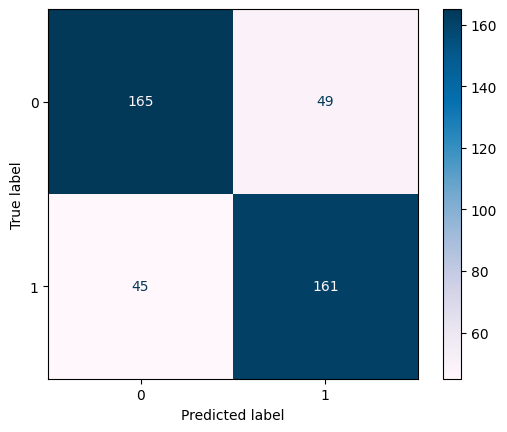

In [165]:
confmatrix = confusion_matrix(y_test, predictions)
confmatrix

visual_confmatrix = ConfusionMatrixDisplay(confmatrix)
visual_confmatrix.plot(cmap='PuBu')

In [166]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
rocauc = roc_auc_score(y_test, predictions)

In [167]:
tn = confmatrix[0][0]
fp = confmatrix[0][1]
specificity = tn/(tn + fp)
specificity

0.7710280373831776

In [168]:
model_scores = {
  'model': 'RandomForestClassifier',
  'accuracy': accuracy,
  'precision': precision,
  'recall': recall,
  'f1_score': f1,
  'roc_auc_score': rocauc,
  'specificity' : specificity
}
model_scores

{'model': 'RandomForestClassifier',
 'accuracy': 0.7761904761904762,
 'precision': 0.7666666666666667,
 'recall': 0.7815533980582524,
 'f1_score': 0.7740384615384616,
 'roc_auc_score': 0.7762907177207149,
 'specificity': 0.7710280373831776}

In [169]:
def save_scores(model_scores: dict):
  status = []
  #Utilizamos un try-except en caso de que el archivo no exista que cree uno
  try:
    #Si el archivo existe continúa por acá
    scores = pandas.read_csv('scores.csv', sep=';')
    status.append('El archivo existe')
    exist = model_scores['model'] in scores['model'].values
    #Validamos si el modelo ya existe en el archivo de scores
    if (exist):
      #Si el modelo ya existe reemplazamos sus valores
      status.append('El modelo existe')
      criteria = scores['model'] == model_scores['model']
      index = scores[criteria].index[0]
      scores.iloc[index] = model_scores
      status.append('Se reemplazaron los valores del modelo')
    else:
      #Si el modelo no existe lo agregamos
      status.append('El modelo no existe')
      df_model_scores = pandas.DataFrame(model_scores, index=[0])
      scores = pandas.concat([scores, df_model_scores], ignore_index=True)
      status.append('Se añadió modelo nuevo y sus valores')
  except:
    #Si no existe el archivo lo creamos y cargamos los scores del modelo
    status.append('El archivo no existe')
    scores = pandas.DataFrame(model_scores, index=[0])

  status.append('Se sobrescrive el archivo scores.csv con valores nuevos')
  scores.to_csv('scores.csv', sep=';', index=False)
  return status

In [170]:
save_scores(model_scores)

['El archivo existe',
 'El modelo existe',
 'Se reemplazaron los valores del modelo',
 'Se sobrescrive el archivo scores.csv con valores nuevos']